######## DATA LOAD
Data loaded
######## GENERAL INFORMATION
######## Total: 
Amount of reviews:  76406
                                          NODE  \
count                                    76406   
unique                                   76406   
top     _:znode0OgQltAL294ALf2YtXz61V1tz2OhhfX   
freq                                         1   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

                                                      URL  \
count                                               76406   
unique                                              26070   
top     https://www.imdb.com/search/title/?title_type=...   
freq                                                

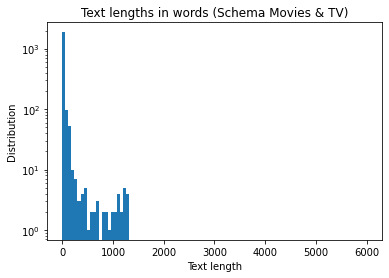

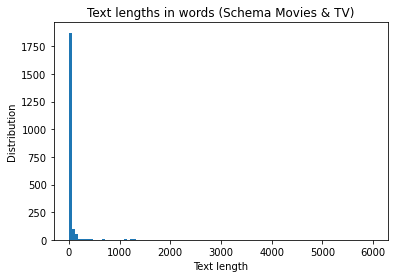

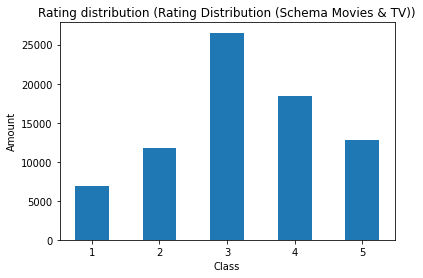

In [1]:
from Scripts import profiling as pf, preprocessing as prep, cleaning as cl
import pandas as pd

print('######## DATA LOAD')
schema_link = '../Data/schema_movie.pkl'
df = pd.read_pickle(schema_link)
print('Data loaded')

print('######## GENERAL INFORMATION')
pf.get_review_count(df)
pf.get_descr(df)

print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))


print('######## DUPLICATION CHECK')
df = cl.remove_duplicates(df)
df = cl.remove_dup_text(df)


print('######## WORD COUNT')
df = pf.create_word_count(df)
pf.get_longest_review(df)
pf.get_shortest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'schema_movie_textlength_raw_logarithmic', 'Schema Movies & TV', True)
pf.show_word_length_dist(df, 'schema_movie_textlength_raw', 'Schema Movies & TV', False)


print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'schema_movie_class_dist_raw', 'Rating Distribution (Schema Movies & TV)')


print('######## DATA SOURCES')
df = pf.get_source_info(df)
print('#### All sources across ratings')
print('#### rating class 1.0')
print(df[df.label==1.0]['netloc'].value_counts())
print('#### rating class 2.0')
print(df[df.label==2.0]['netloc'].value_counts())
print('#### rating class 3.0')
print(df[df.label==3.0]['netloc'].value_counts())
print('#### rating class 4.0')
print(df[df.label==4.0]['netloc'].value_counts())
print('#### rating class 5.0')
print(df[df.label==5.0]['netloc'].value_counts())

In [2]:
df.head()

,NODE,URL,text,label,word_count,netloc
106197,_:node7788d74dd3601fb097d98e3c7d47d5a,https://thereviewmonk.com/movie/chittagong/,""" Shot ever so beautifully, Chittagong is a te...",3.0,57,thereviewmonk.com
106199,_:node4d3b78dd51f3c8821591f0407881d6e,https://thereviewmonk.com/movie/chittagong/,""" This is a film that needs watching, because ...",4.0,21,thereviewmonk.com
106201,_:nodea5179c3516155f22dfbd0e71a4691,https://thereviewmonk.com/movie/chittagong/,""" And while Chittagong falls well short of bei...",3.0,26,thereviewmonk.com
106203,_:node7e1a7e8c2a31d8e71bf6e3fe579d1778,https://thereviewmonk.com/movie/chittagong/,""" An absolute must watch. ""@en-US",4.0,6,thereviewmonk.com
106205,_:node49f7761f3f49cfd93937456697796a0,https://thereviewmonk.com/movie/chittagong/,""" What makes Chittagong particularly special i...",4.0,46,thereviewmonk.com


In [ ]:
# After preprocessing
schema_df.text = prep.preprocess_reviews(schema_df.text)

In [10]:
schema_df.head()

,text,label,word_count
0,shot ever beauti chittagong textur film but ma...,3.0,57
1,film need watch forget would tragic en us,4.0,21
2,chittagong fall well short great film not help...,3.0,26
3,absolut must watch en us,4.0,6
4,make chittagong particularli special way depic...,4.0,46


In [13]:
schema_df[schema_df['text'].isin(schema_df['text'][schema_df['text'].duplicated()])]

,text,label,word_count
2,chittagong fall well short great film not help...,3.0,26
6,well craft compel en us,3.0,5
48,nawazuddin siddiqui capabl carri film shoulder...,2.0,22
49,film like sixer golf field irrelev unnecessari...,2.0,23
50,despit clich melodrama found freaki ali worth ...,3.0,34
...,...,...,...
75527,wish film braver intent creat realli crack rom...,2.0,26
75567,come away mix feel even though realli love ide...,2.0,22
75603,hormon crazi romant comedi let tepid direct,2.0,12
75654,review current post patreon support deep focu ...,2.0,67


In [ ]:
# WORD COUNT DISTRIBUTION THROUGHOUT RATINGS
pf.show_word_length_per_label(df)


